# Das sdata-Format 

## Ein Beispiel zur Ablage einer Tabelle im sdata-Format

Dieses Beispiel zeigt die Ablage einer Tabelle mit zwei Spalten im `sdata`-Format. 
        

In [1]:
import pandas as pd
df = pd.DataFrame({"column_a": [1.1, 2.1, 3.5],
                   "column_b": [2.4, 5.2, 2.2]}, index=[10, 11, 12])
df.index.name = "index" 
df

,column_a,column_b
index,,
10,1.1,2.4
11,2.1,5.2
12,3.5,2.2


**sdata** steht für **strukturierte Daten**. [`sdata`](https://github.com/lepy/sdata) ist eine unter der [MIT-Lizenz](https://raw.githubusercontent.com/lepy/sdata/master/LICENSE-MIT) veröffentlichte open-source [Python-Bibiothek](https://pypi.org/project/sdata/), welche das sdata-Format unterstützt. Installiert wird die Bibliothek mittels ``pip install sdata``. Die Dokumentation wird unter [sdata.readthedocs.io](https://sdata.readthedocs.io/en/latest/) veröffentlicht. 

In [2]:
import sdata
print("sdata v{}".format(sdata.__version__))

sdata v0.24.1


## Die Komponenten des sdata-Formates

Das sdata-Datenformat `Data` besteht aus drei Komponenten: den Daten (hier eine **Tabelle** `table`), den **Metadaten** `metadata` 
(`name`, `uuid`, ...) und einer **Beschreibung** der Daten `description`.



In [3]:
data = sdata.Data(name="my data name", table=df, description="my data description")
print("data:            \t {0}".format(type(data)))
print("data.metadata:   \t {0}".format(type(data.metadata)))
print("data.table:      \t {0}".format(type(data.table)))
print("data.description:\t {0}".format(type(data.description)))

data:            	 <class 'sdata.data.Data'>
data.metadata:   	 <class 'sdata.metadata.Metadata'>
data.table:      	 <class 'pandas.core.frame.DataFrame'>
data.description:	 <class 'str'>


### sdata.Data.metadata

Jeder Datensatz `Data` benötigt einen Namen `name`. Die vom User vorgegebene Identifikation des Datensatzes ist aber mit einer hohen 
Wahrscheinlichkeit nicht eindeutig, da i.d.R sehr kurze Bezeichnungen gewählt werden. 



In [4]:
data = sdata.Data(name="basic example")
print("data.name:\t '{0.name}'".format(data))

data.name:	 'basic example'


Zur Identifikation eines Datensatzes ist eine möglichst eindeutige Bezeichnung hilfreich. Üblicherweise wird hierzu ein sogenannter Universally Unique Identifier [`uuid`] (https://de.wikipedia.org/wiki/Universally_Unique_Identifier) verwendet. Diese Merkmale eines Datensatzes werden im sdata-Format in den Metadaten gespeichert. Diese `uuid` wird automatisch bei jeder Instanziierung eines `sdata.Data`-Objektes generiert. 


In [5]:
data = sdata.Data(uuid="8b1e85eded1241eb854be3365bcf9884")
print("data.uuid:\t '{0.uuid}'".format(data))

data.uuid:	 '8b1e85eded1241eb854be3365bcf9884'


Die `uuid` kann aber auch basierend auf einem - möglichst eindeutigen - Names generiert werden.

In [6]:
my_uuid = sdata.uuid_from_str("Das ist ein möglichst eindeutiger Name für die Daten")
data = sdata.Data(uuid=my_uuid)
print("data.uuid:\t '{0.uuid}'".format(data))

data.uuid:	 '06f8c76b037c3636a40246f024e87574'


Die Komponente `metadata` hat also mindestenz zwei Attribute `name` und `uuid`. Die einfachste Form eines Attributes 
stellt ein key-value-Tupel dar, d.h. eine Verknüpfung einer Bedeutung mit einer Ausprägung, z.B. `Augenfarbe="blau"` 
oder `name="basic example"`.

In [7]:
attribute1 = sdata.Attribute("Augenfarbe", "blau")
attribute1

(Attr'Augenfarbe':blau(str))

Ein `Attribut` (Eigenschaft) des Datenobjektes hat im sdata-Format die Felder

* `name` ... Name des Attributes
* `value` ... Wert des Attributes
* `dtype` ... Datentyp des Attributwertes `values` (default=`str`)
* `unit` ... physikalische Einheit des Attributes (*optional*)
* `description` ... Beschreibung des Attributes (*optional*)
* `label` ... optionales Label des Attributes, z.B. für Plotzwecke 


In [8]:
attribute2 = sdata.Attribute(name="answer", 
                             value=42, 
                             dtype="int", 
                             unit="-", 
                             description="""The Answer to the Ultimate Question of Life, The Universe, and Everything""", 
                             label="Die Antwort")
attribute2.to_dict()

{'name': 'answer',
 'value': 42,
 'unit': '-',
 'dtype': 'int',
 'description': 'The Answer to the Ultimate Question of Life, The Universe, and Everything',
 'label': 'Die Antwort',
 'required': False}

Attribute werden in den Metadaten gespeichert.

In [9]:
metadata = sdata.Metadata()
metadata.add(attribute1)
metadata.add(attribute2)
print(metadata)
print(metadata.df)

(Metadata'N.N.':2 ['Augenfarbe', 'answer'])
                  name value unit dtype  \
key                                       
Augenfarbe  Augenfarbe  blau    -   str   
answer          answer    42    -   int   

                                                  description        label  \
key                                                                          
Augenfarbe                                                                   
answer      The Answer to the Ultimate Question of Life, T...  Die Antwort   

            required  
key                   
Augenfarbe     False  
answer         False  


Ein Attribut - auch Eigenschaft genannt - stellt demnach ein Merkmal des Datenobjektes dar. Nützlich ist auch eine 
Angabe einer physikalischen Größe, welche i.d.R. Einheiten behaftet ist. Exemplarisch ist hier ein Attribut 
`Temperatur` mit der Ausprägung `25.4°C` aufgeführt. Die physikalische Einheit wird im Attributfeld `unit` abgelegt 
(`unit="degC"`) und der Zahlenwert im Feld `value=25.4`. Da eine physikalische Größe aus dem Produkt einer (reelen) Zahl und 
einer physikalischen Einheit besteht, sieht das sdata-Attribut-Format auch ein Attributfeld `dtype` 
zur Definition des Datentypes für den Attributwert `value` vor. Ferner kann jedes Attribut im Feld `description` genauer beschrieben werden. Optional kann auch ein Label für Plot-Zwecke angegeben werden.



In [10]:
data = sdata.Data(name="basic example", 
                  uuid="38b26864e7794f5182d38459bab85842", 
                  table=df)
data.metadata.add("Temperatur", 
                  value=25.4, 
                  dtype="float", 
                  unit="degC", 
                  description="Temperatur", 
                  label="Temperatur T [°C]")
print(data.metadata.df)

                          name  \
key                              
!sdata_class      !sdata_class   
!sdata_ctime      !sdata_ctime   
!sdata_mtime      !sdata_mtime   
!sdata_name        !sdata_name   
!sdata_parent    !sdata_parent   
!sdata_project  !sdata_project   
!sdata_sname      !sdata_sname   
!sdata_suuid      !sdata_suuid   
!sdata_url          !sdata_url   
!sdata_uuid        !sdata_uuid   
!sdata_version  !sdata_version   
Temperatur          Temperatur   

                                                            value  unit  \
key                                                                       
!sdata_class                                                 Data     -   
!sdata_ctime                     2025-01-14T16:36:43.417091+00:00     -   
!sdata_mtime                     2025-01-14T16:36:43.417137+00:00     -   
!sdata_name                                         basic example     -   
!sdata_parent                                                         -  

### sdata.Data.table
Das eigentliche Datenobjekt `table` ist als `pandas.DataFrame` repräsentiert, d.h. jede Zelle der Tabelle ist durch 
ein Tupel (index, column) indiziert. Jede Spalte (`column`) ist durch den Spaltennamen (hier z.B. `time` oder `temperature`) indizierbar. 
Jede Zeile (`row`) ist durch den `index` indiziert, wobei der `index` auch alphanumerisch sein kann (z.B. 'max_temp').


In [11]:
df = pd.DataFrame({"time": [1.1, 2.1, 3.5],
                   "temperature": [2.4, 5.2, 2.2]}, index=[0, 1, 2])
df.index.name = "index" 
df

,time,temperature
index,,
0,1.1,2.4
1,2.1,5.2
2,3.5,2.2


### sdata.Data.decription

Die Beschreibung `description` ist vom Typ `str`.

In [12]:
data.description = "Messergebnis Temperatur."
print(data.description)

Messergebnis Temperatur.


Es ist möglich eine vereinfachte Auszeichnungssprache 
wie [Markdown](https://de.wikipedia.org/wiki/Markdown) verwendbar. Beispielhaft ist hier Datenbeschreibung mit Überschriften und Formel aufgeführt.   






# Messergebnis Temperatur.
## subheader

a remarkable text

Bullet list:

- aaa
    - aaa.b
- bbb


Numbered list:

1. foo
1. bar

$f(x) = \frac{1}{2}\sin(x)$

code:

    name="basic example"

A [Link](https://github.com/lepy/sdata).

In [13]:
data.description = r"""# Messergebnis Temperatur
## subheader

a remarkable text

Bullet list:

- aaa
    - aaa.b
- bbb


Numbered list:

1. foo
1. bar

$f(x) = \frac{1}{2}\sin(x)$

code:

    name = "basic example"

A [Link](https://github.com/lepy/sdata)."""


In [14]:
print(data.description)

# Messergebnis Temperatur
## subheader

a remarkable text

Bullet list:

- aaa
    - aaa.b
- bbb


Numbered list:

1. foo
1. bar

$f(x) = \frac{1}{2}\sin(x)$

code:

    name = "basic example"

A [Link](https://github.com/lepy/sdata).


## Beispiel einer *Temperaturmessung-001*

Die Daten bestehen aus einer Tabelle mit zwei Spalten für die Zeit und eine gemessene Temperatur. 

In [15]:
df = pd.DataFrame({"time": [1.1, 2.1, 3.5],
                   "temperature": [2.4, 5.2, 2.2]},
                  index=[0, 1, 2])
df

,time,temperature
0,1.1,2.4
1,2.1,5.2
2,3.5,2.2


Das `sdata.Data`-Objekt wird mit einen Names und einer aus dem Namen generierten `uuid` versehen. Weiterhin wird für jede Spalte der Tabelle ein Attribut definiert, welche u.a. die physikalische Einheit der Spaltenwerte abbildet.

In [16]:
data_name = "Temperaturmessung-001"
data = sdata.Data(name=data_name, 
                  uuid=sdata.uuid_from_str(data_name),
                  table=df,
                  description="Messergebnis Temperatur")
data.metadata.add("time", 
                  value=None, 
                  dtype="float", 
                  unit="s", 
                  description="Zeitachse", 
                  label="time $t$")
data.metadata.add("temperature", 
                  value=None, 
                  dtype="float", 
                  unit="°C", 
                  description="Zeitachse", 
                  label="temperature $T$")
data.describe()

,0
metadata,13
table_rows,3
table_columns,2
description,23


plot


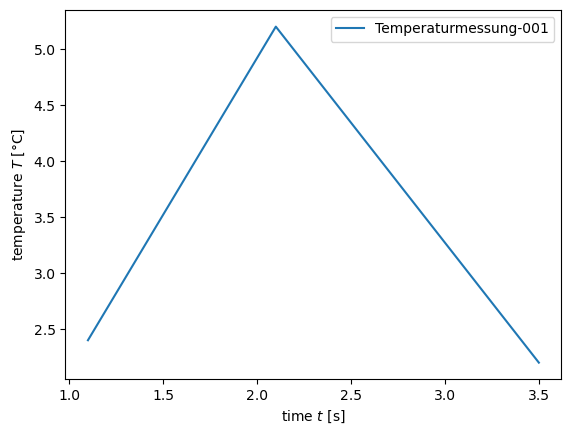

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_var = "time"
y_var = "temperature" 

x_attr = data.metadata.get(x_var)
y_attr = data.metadata.get(y_var)

ax.plot(data.df[x_var], data.df[y_var], label=data.name)
ax.legend(loc="best")
ax.set_xlabel("{0.label} [{0.unit}]".format(x_attr))
ax.set_ylabel("{0.label} [{0.unit}]".format(y_attr))
print("plot")

### Export

Der Export kann in verschiedene Formate erfolgen.

In [18]:
import os
filepath_xlsx = os.path.join("/tmp", data.osname + ".xlsx")
data.to_xlsx(filepath=filepath_xlsx)
print("Saved '{0.name}' to '{1}'.".format(data, filepath_xlsx))

Saved 'Temperaturmessung-001' to '/tmp/temperaturmessung-001.xlsx'.


In [19]:
filepath_json = os.path.join("/tmp", data.osname + ".json")
data.to_json(filepath=filepath_json)
print("Saved '{0.name}' to '{1}'.".format(data, filepath_json))

Saved 'Temperaturmessung-001' to '/tmp/temperaturmessung-001.json'.


In [20]:
filepath_csv = os.path.join("/tmp", data.osname + ".csv")
data.to_csv(filepath=filepath_csv)
print("Saved '{0.name}' to '{1}'.".format(data, filepath_csv))

Saved 'Temperaturmessung-001' to '/tmp/temperaturmessung-001.csv'.


### Import

Der Import kann aus den verschiedene Export-Formate erfolgen.

In [21]:
filepath_xlsx = os.path.join("/tmp", data.osname + ".xlsx")
data_xlsx = data.from_xlsx(filepath=filepath_xlsx)
data_xlsx

(Data 'Temperaturmessung-001':e13d9387728c375eb98686eacf42b6df)

In [22]:
data.sha3_256_metadata, data_xlsx.sha3_256_metadata
data.description, data_xlsx.description


('Messergebnis Temperatur', 'Messergebnis Temperatur')

In [23]:
filepath_json = os.path.join("/tmp", data.osname + ".json")
data_json = data.from_json(filepath=filepath_json)
data_json

(Data 'Temperaturmessung-001':e13d9387728c375eb98686eacf42b6df)

In [24]:
#data.mdf, data_xlsx.mdf

Jedes `sdata.Data`-Objekt kann seinen Hash-Wert bestimmen. Dieser Hash-Wert, hier ein ``sha3-256``, kann u.a. zum Vergleich der Daten benutzt werden.

In [25]:
filepath_parquet = os.path.join("/tmp", data.osname + ".pq")
data.to_parquet(filepath_parquet, engine="pyarrow")

In [26]:
filepath_parquet = os.path.join("/tmp", data.osname + ".pq")
data_pq = data.from_parquet(filepath=filepath_parquet)
data_pq

(Data 'Temperaturmessung-001':e13d9387728c375eb98686eacf42b6df)

In [28]:
print(data.sha3_256)
print(data_xlsx.sha3_256)
print(data_json.sha3_256)
print(data_pq.sha3_256)
assert data.sha3_256==data_xlsx.sha3_256
assert data.sha3_256==data_json.sha3_256
assert data.sha3_256==data_pq.sha3_256




d3dca5ae6fc3c0dad5273e5930c1946c59610d259ee54eb894e06d754efdd97f
d3dca5ae6fc3c0dad5273e5930c1946c59610d259ee54eb894e06d754efdd97f
d3dca5ae6fc3c0dad5273e5930c1946c59610d259ee54eb894e06d754efdd97f
d3dca5ae6fc3c0dad5273e5930c1946c59610d259ee54eb894e06d754efdd97f


### Zusammenfassung

Das `sdata`-Format bietet eine einfache Möglichkeit Daten lesbar für Menschen und zugleich maschinenlesbar abzulegen. Dies wird u.a. durch die Import-Export-Formate `xlsx`, `json`, `csv` gewährleistet. Durch die Qualifikation der Massendaten durch Metadaten und einer Beschreibung in Textform ist eine vollständige Beschreibung der Daten möglich. Die open-source Python-Bibliothek [`sdata`](https://github.com/lepy/sdata) erlaubt eine einfach Benutzung und Erweiterung des Datenformates.

In [30]:
os.system("jupyter nbconvert --to slides Das_sdata_Format.ipynb")

[NbConvertApp] Converting notebook Das_sdata_Format.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 382231 bytes to Das_sdata_Format.slides.html


0

In [31]:
data.df

,time,temperature
index,,
0,1.1,2.4
1,2.1,5.2
2,3.5,2.2
